In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Dataset generation

In [ ]:
def pendulum_dynamics(x, u, params):  # Compute the function f(x,t) such that theta'' = f(x,t)
  theta, omega = x
  m, l, g = params["m"], params["l"], params["g"]
  u = float(u)

  d_theta = omega
  d_omega = (g/l) * np.sin(theta) + u/(m * l**2)

  return np.array([d_theta, d_omega])

def rk4_step(f, x, u, dt, params):  # Compute the position after a short time dt based on the pervious position using rk4 method
  k1 = f(x, u, params)
  k2 = f(x + 0.5 * dt * k1, u, params)
  k3 = f(x + 0.5 * dt * k2, u, params)
  k4 = f(x + dt * k3, u, params)

  return x + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

def trajectory_simulation(x0, u_control, dt, T, params):
  N = int(T/dt)
  x = np.zeros((N+1, 2))
  x[0] = x0

  for t in range(N):
    x[t+1] = rk4_step(pendulum_dynamics, x[t], u_control[t], dt, params)
  return x


In [ ]:
#--------------
# Parameters
#--------------

params = {
    "g": 9.81,   # gravity (m/s^2)
    "l": 1.0,    # lenght (m)
    "m": 1.0     # mass (kg)
}

T = 5.0  # = 5s
dt = 0.01  # 500 step
n_traj = 200  #  100 000 points
u_max = 0.5

#------------
# Storage
#------------
X = []
U = []
X_next = []
traj_IDs = []

#-------------------
# Data generation
#-------------------

for k in range(n_traj):
  theta0 = np.random.uniform(-np.pi, np.pi)  #random initialisation of the angle
  omega0 = np.random.uniform(-1.0, 1.0)      #random initialisation of the angular velocity
  u_traj = np.random.uniform(-u_max, u_max, size=(int(T/dt),1))
  x0 = np.array([theta0, omega0])

  traj = trajectory_simulation(x0, u_traj, dt, T, params)

  X.append(traj[:-1]) # We don't include the last one because there is no future state to predict
  X_next.append(traj[1:])  # We don't include the first one because there is no previous state to predict the first one
  U.append(u_traj)
  traj_IDs.append( k * np.ones(int(T/dt), dtype=int) )

X = np.concatenate(X, axis=0)
X_next = np.concatenate(X_next, axis=0)
U = np.concatenate(U, axis=0)
traj_IDs = np.concatenate(traj_IDs)

#------------
#   Save
#------------

np.savez(
         "pendulum_dataset.npz",
         X=X,   # shape (N * (T / dt),2)
         U=U,   # shape (N * (T / dt),1)
         X_next=X_next,   # shape (N * (T / dt), 2)
         traj_ID=traj_IDs,   # shape (N * (T / dt), 1)
         dt=dt
         )

/tmp/ipython-input-3023866503.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u = float(u)


##Verification

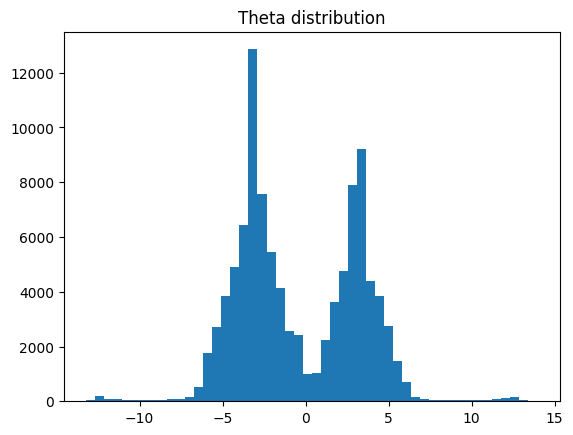

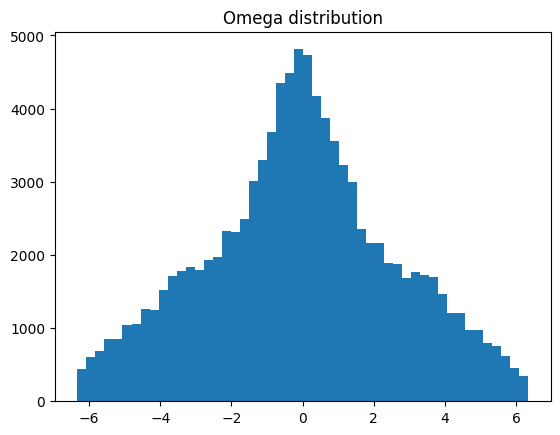

[1.28735835 1.28174781 1.2770463  1.27327917 1.27047578 1.26862303
 1.26772079 1.26775851 1.26873687 1.27066428]
[1.28174781 1.2770463  1.27327917 1.27047578 1.26862303 1.26772079
 1.26775851 1.26873687 1.27066428 1.27354806]
[[-0.29239219]
 [-0.33338416]
 [ 0.2407834 ]
 [ 0.27574883]
 [-0.00527539]
 [ 0.28386904]
 [-0.21085883]
 [ 0.29702091]
 [-0.04789774]
 [ 0.43175688]]
(100000, 1)
(100000, 2)
(100000, 2)
(100000,)
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
plt.hist(X[:,0],bins = 50)
plt.title("Theta distribution")
plt.show()
plt.hist(X[:,1],bins = 50)
plt.title("Omega distribution")
plt.show()

print(X[0:10,0])
print(X_next[0:10,0])
print(U[0:10])
print(U.shape)
print(X.shape)
print(X_next.shape)
print(traj_IDs.shape)
print(traj_IDs[0:10])


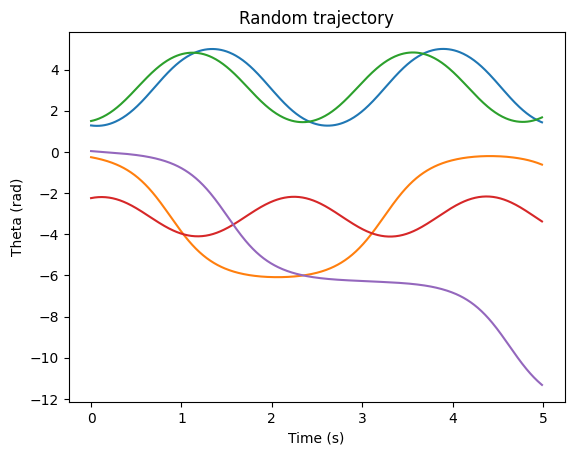

In [ ]:
t = np.arange(start=0.0, stop=5.00, step=0.01)
for k in range(5):
  plt.plot(t,X[k*500:(k+1)*500,0])  # plot random trajectory in the dataset
plt.title("Random trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.show()